In [18]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data=pd.read_csv("D:\\3YR\\TEKWORKS\\Jan-7,8\\Social_Network_Ads.csv")
df=pd.DataFrame(data)

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
X = df.iloc[: , 2:4].values
y=df.iloc[: , -1].values

In [8]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y, test_size=0.2 , random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(
    criterion="entropy")

classifier.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy')

In [24]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=4
)

classifier1.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [26]:
y_pred =classifier.predict(x_test)
y_pred1 =classifier1.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n ",cm)
#new
accuracy1 = accuracy_score(y_test, y_pred1)
cm1 = confusion_matrix(y_test, y_pred1)
print("Accuracy1:", accuracy1)
print("Confusion Matrix1:\n ",cm1)

Accuracy: 0.8375
Confusion Matrix:
  [[46  6]
 [ 7 21]]
Accuracy1: 0.9125
Confusion Matrix1:
  [[47  5]
 [ 2 26]]


<Axes: >

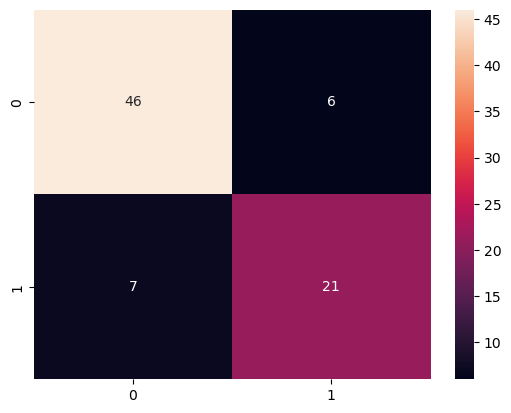

In [29]:
sns.heatmap(cm,annot=True)

<Axes: >

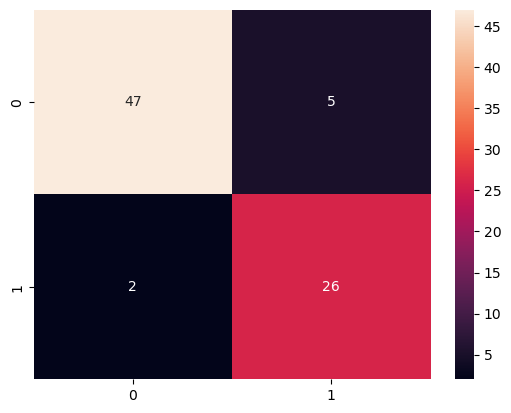

In [30]:
sns.heatmap(cm1,annot=True)

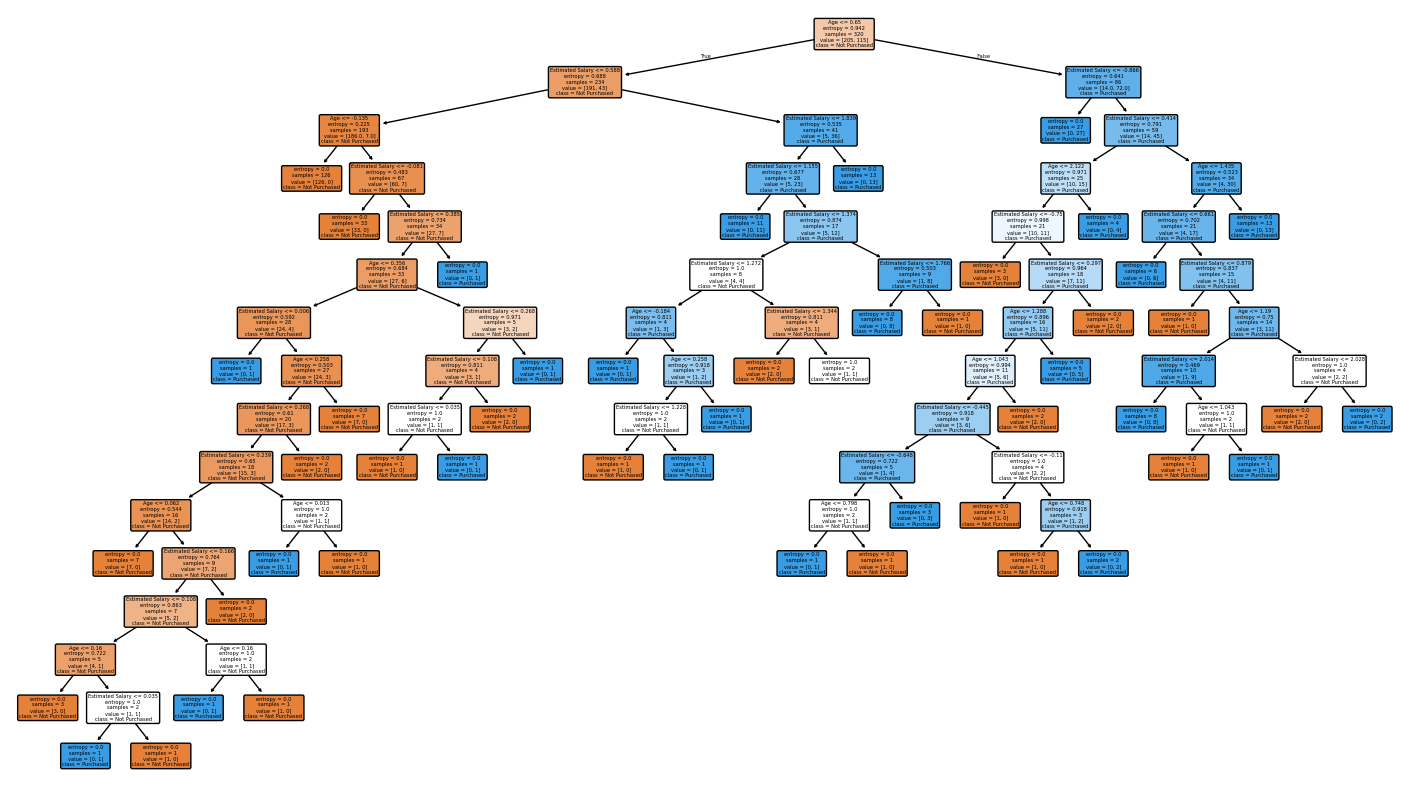

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))
plot_tree(
    classifier,
    feature_names=["Age", "Estimated Salary"],
    class_names=["Not Purchased", "Purchased"],
    filled=True,
    rounded=True
)
plt.show()

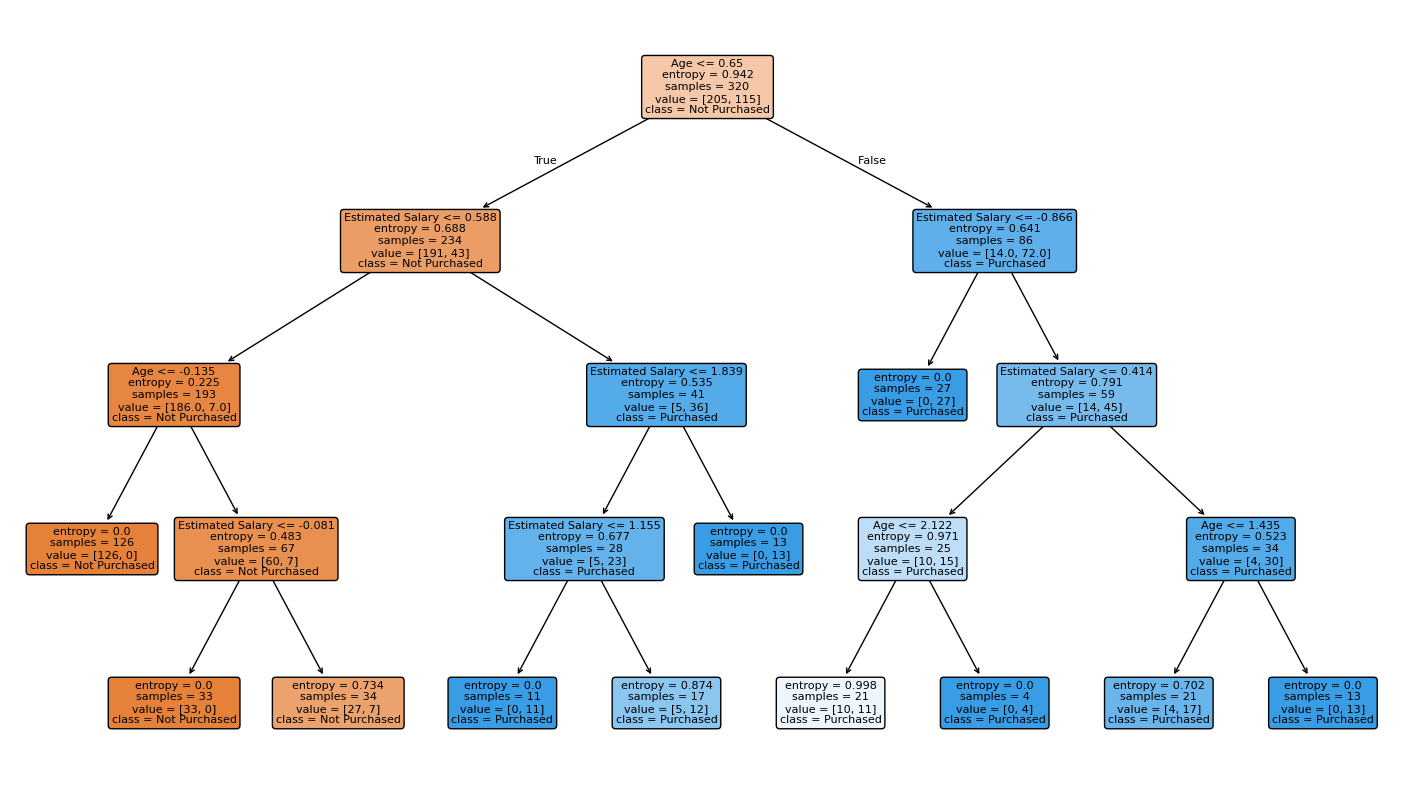

In [31]:
plt.figure(figsize=(18, 10))
plot_tree(
    classifier1,
    feature_names=["Age", "Estimated Salary"],
    class_names=["Not Purchased", "Purchased"],
    filled=True,
    rounded=True
)
plt.show()

random forest tree

In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10 , criterion='entropy' )
rfc.fit(x_train , y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [80]:
y_rfc =rfc.predict(x_test)

In [81]:
from sklearn.metrics import accuracy_score,confusion_matrix
acc_rfc = accuracy_score(y_test, y_rfc)
cm_rfc= confusion_matrix(y_test, y_rfc)
print("Accuracy:", acc_rfc)
print("Confusion Matrix:\n ",cm_rfc)

Accuracy: 0.85
Confusion Matrix:
  [[46  6]
 [ 6 22]]


<Axes: >

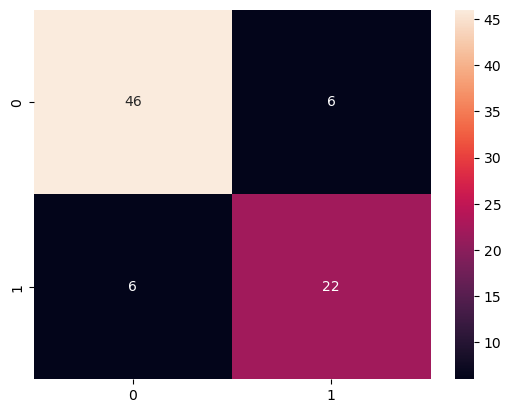

In [82]:
sns.heatmap(cm_rfc,annot=True)

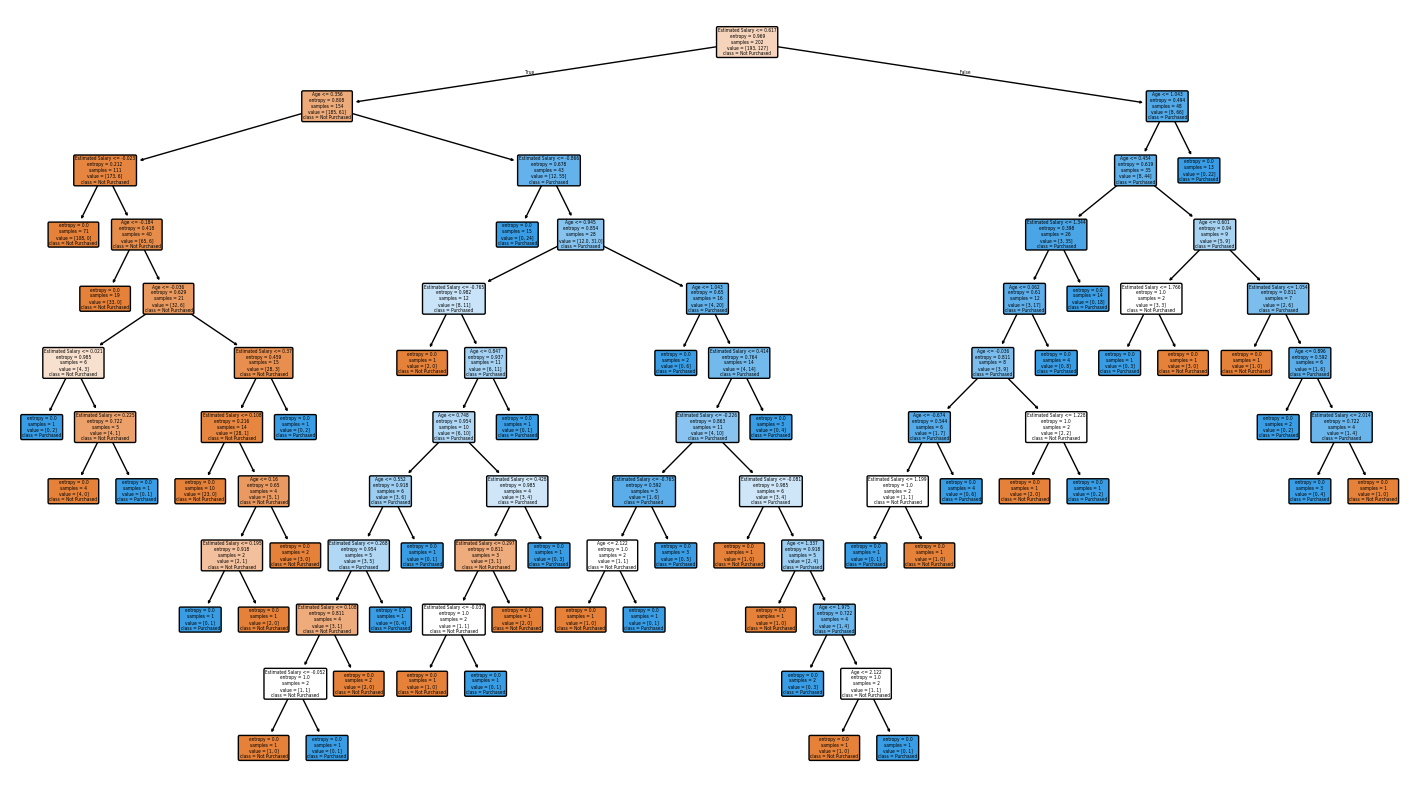

In [85]:
singletree=rfc.estimators_[0]
plt.figure(figsize=(18, 10))
plot_tree(
    singletree,
    feature_names=["Age", "Estimated Salary"],
    class_names=["Not Purchased", "Purchased"],
    filled=True,
    rounded=True
)
plt.show()

New code

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

In [53]:
rose=sns.load_dataset("titanic")

In [54]:
rose.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [55]:
rose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [56]:
rose.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [57]:
rose=rose[["survived","pclass","sex","age","fare","embarked"]]
rose.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [58]:
rose.isna().sum()

survived      0
pclass        0
sex           0
age         177
fare          0
embarked      2
dtype: int64

In [59]:
rose["age"].fillna(rose["age"].median())
rose["embarked"].fillna(rose["embarked"].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [60]:
encoder = LabelEncoder()

rose["sex"] = encoder.fit_transform(rose["sex"])
rose["embarked"] = encoder.fit_transform(rose["embarked"])

rose.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2


In [65]:
X1 = rose.drop("survived", axis=1)
y1 = rose["survived"]

X1.head(), y1.head()

(   pclass  sex   age     fare  embarked
 0       3    1  22.0   7.2500         2
 1       1    0  38.0  71.2833         0
 2       3    0  26.0   7.9250         2
 3       1    0  35.0  53.1000         2
 4       3    1  35.0   8.0500         2,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: survived, dtype: int64)

In [66]:
model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,
    random_state=42
)
model.fit(X1, y1)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [67]:
from sklearn.model_selection import train_test_split
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(X1 , y1, test_size=0.2 , random_state=42)

In [69]:
y_1 =model.predict(x_test1)

In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix
acc_rose = accuracy_score(y_test1, y_1)
cm_rose = confusion_matrix(y_test1, y_1)
print("Accuracy:", acc_rose)
print("Confusion Matrix:\n ",cm_rose)

Accuracy: 0.8156424581005587
Confusion Matrix:
  [[98  7]
 [26 48]]


<Axes: >

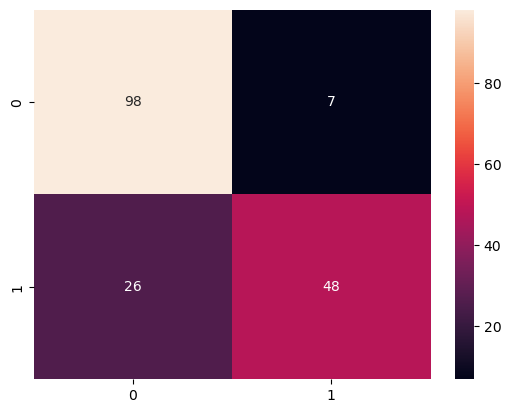

In [72]:
sns.heatmap(cm_rose,annot=True)

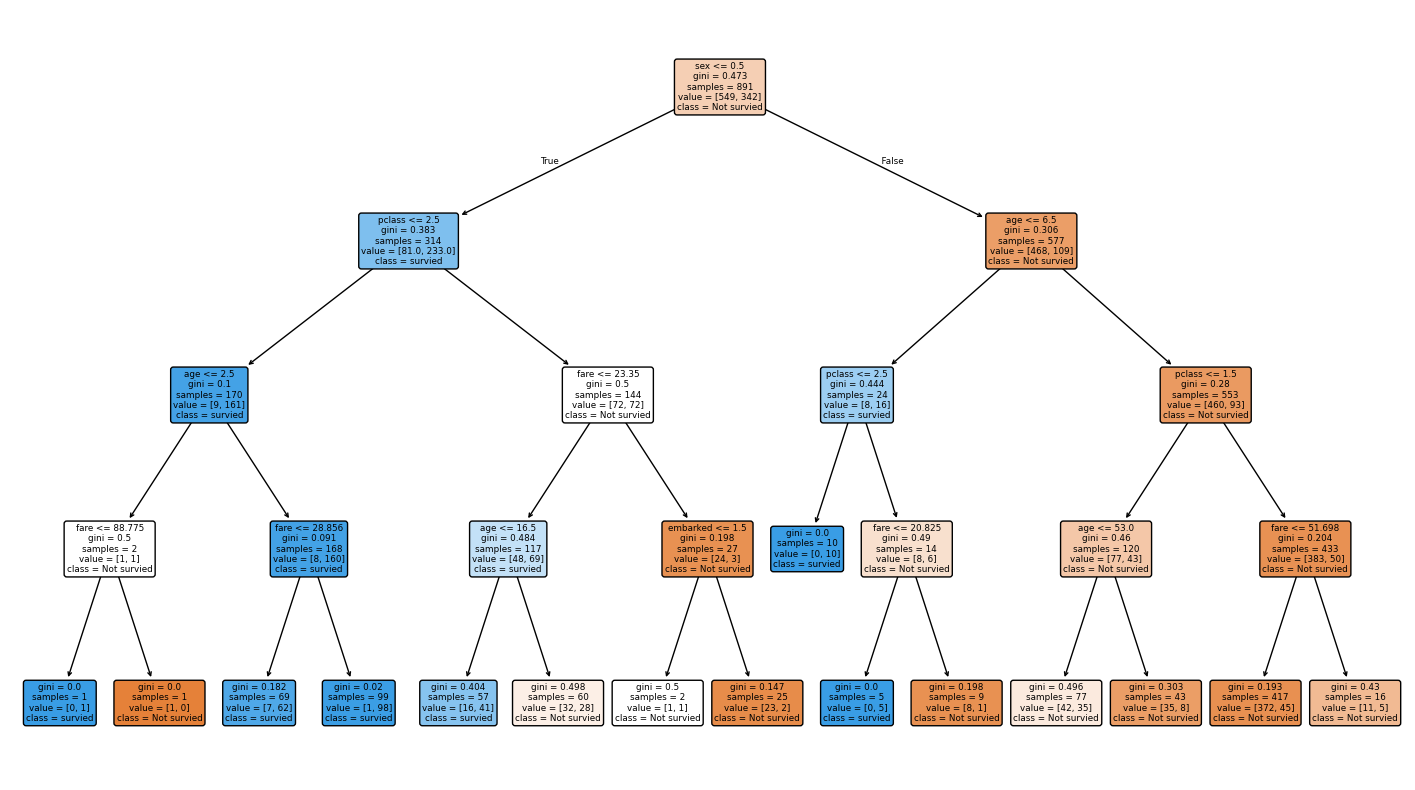

In [70]:
plt.figure(figsize=(18, 10))
plot_tree(
    model,
    feature_names=X1.columns,
    class_names=["Not survied", "survied"],
    filled=True,
    rounded=True
)
plt.show()

In [73]:
new_passenger = pd.DataFrame([[3, 1, 25, 7, 2]], columns=X.columns)

prediction = model.predict(new_passenger)
prediction

array([0])

In [77]:
if prediction[0] == 1:
    print("Passenger is likely to Survive")
else:
    print("Passenger is likely NOT to Survive")

Passenger is likely NOT to Survive
